## Introduction

This notebook analyzes contributions made by students, grouped by primary programming language. The aim is to identify which languages have the highest average contributions per student.

## Loading Libraries

We begin by importing the necessary libraries for data processing and visualization: `pandas` for data manipulation and `matplotlib` for plotting.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import MinMaxScaler

## Loading Data

Next, we load two CSV files containing summary data of contributors. These data files provide information on the contributions by students based on their primary language.

In [38]:
ebl_data = pd.read_csv('../data/contributors_summary_ebl.csv')
pbl_data = pd.read_csv('../data/contributors_summary_pbl.csv')

display(ebl_data.head(), pbl_data.head())

,user,contributions,repositories,primary_language,monthly_contributions,contribution_types
0,Victor-oss,397,31,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 258, 'pull_requests': 51, 'issues'..."
1,GeovaneSFT,630,20,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 343, 'pull_requests': 4, 'issues':..."
2,AnHoff,435,16,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 366, 'pull_requests': 19, 'issues'..."
3,davidCarlos,3028,24,Python,"{'2017-01': 10, '2017-02': 5, '2017-03': 4, '2...","{'commits': 2719, 'pull_requests': 11, 'issues..."
4,isabellacgmsa,752,60,JavaScript,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 605, 'pull_requests': 46, 'issues'..."


,user,contributions,repositories,primary_language,monthly_contributions,contribution_types
0,StrangeUnit28,552,16,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 410, 'pull_requests': 43, 'issues'..."
1,owen2,1228,15,C#,"{'2017-01': 0, '2017-02': 2, '2017-03': 1, '20...","{'commits': 64, 'pull_requests': 2, 'issues': ..."
2,belyalov,2101,30,Go,"{'2017-01': 1, '2017-02': 0, '2017-03': 0, '20...","{'commits': 515, 'pull_requests': 44, 'issues'..."
3,ronanmu,99,8,Python,"{'2017-01': 0, '2017-02': 2, '2017-03': 0, '20...","{'commits': 31, 'pull_requests': 8, 'issues': ..."
4,italovinicius18,1126,74,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 731, 'pull_requests': 100, 'issues..."


In [39]:
def safe_loads(s):
    try:
        return json.loads(s.replace("'", '"'))
    except:
        return s

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def prepare_data(df):
    df['contribution_types'] = df['contribution_types'].apply(safe_loads)
    
    df_types = pd.json_normalize(df['contribution_types'])
    for col in df_types.columns:
        df[col] = df_types[col]
    
    return df

def remove_specified_outliers(df, columns):
    for col in columns:
        df = remove_outliers(df, col)
    return df

columns_to_filter = ['contributions', 'repositories', 'commits', 'pull_requests', 'issues', 'reviews']

pbl_data = prepare_data(pbl_data)
ebl_data = prepare_data(ebl_data)

pbl_filtered = remove_specified_outliers(pbl_data, columns_to_filter)
ebl_filtered = remove_specified_outliers(ebl_data, columns_to_filter)


## Calculating Average Contributions

We calculate the average contributions per student by first grouping the contributions by the primary language, then dividing the total contributions by the number of students. The number of students is dynamically calculated based on the data loaded.

In [40]:
def normalize_data(df, column):
    scaler = MinMaxScaler()
    df[column + '_normalized'] = scaler.fit_transform(df[[column]])
    return df

ebl_normalized = normalize_data(ebl_filtered, 'contributions')
pbl_normalized = normalize_data(pbl_filtered, 'contributions')

display(ebl_normalized.head(), pbl_normalized.head())


,user,contributions,repositories,primary_language,monthly_contributions,contribution_types,commits,pull_requests,issues,reviews,contributions_normalized
0,Victor-oss,397,31,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 258, 'pull_requests': 51, 'issues'...",258,51,55,8,0.198936
1,GeovaneSFT,630,20,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 343, 'pull_requests': 4, 'issues':...",343,4,5,2,0.322872
2,AnHoff,435,16,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 366, 'pull_requests': 19, 'issues'...",366,19,29,9,0.219149
5,lucasgcaldas,998,58,Java,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 647, 'pull_requests': 38, 'issues'...",647,38,14,16,0.518617
6,GustavoHenriqueRS,472,28,TypeScript,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 206, 'pull_requests': 8, 'issues':...",206,8,2,0,0.238830


,user,contributions,repositories,primary_language,monthly_contributions,contribution_types,commits,pull_requests,issues,reviews,contributions_normalized
1,owen2,1228,15,C#,"{'2017-01': 0, '2017-02': 2, '2017-03': 1, '20...","{'commits': 64, 'pull_requests': 2, 'issues': ...",64.0,2.0,6.0,6.0,0.217384
2,belyalov,2101,30,Go,"{'2017-01': 1, '2017-02': 0, '2017-03': 0, '20...","{'commits': 515, 'pull_requests': 44, 'issues'...",515.0,44.0,22.0,20.0,0.371924
3,ronanmu,99,8,Python,"{'2017-01': 0, '2017-02': 2, '2017-03': 0, '20...","{'commits': 31, 'pull_requests': 8, 'issues': ...",31.0,8.0,0.0,0.0,0.017525
4,italovinicius18,1126,74,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 731, 'pull_requests': 100, 'issues...",731.0,100.0,70.0,26.0,0.199327
8,a15filba,128,2,JavaScript,"{'2017-01': 0, '2017-02': 0, '2017-03': 5, '20...","{'commits': 78, 'pull_requests': 22, 'issues':...",78.0,22.0,3.0,23.0,0.022659


In [41]:
ebl_count = ebl_normalized.shape[0]
pbl_count = pbl_normalized.shape[0]

if pbl_count > ebl_count:
    pbl_balanced = pbl_normalized.sample(n=ebl_count, random_state=42)
else:
    pbl_balanced = pbl_normalized

print(f"ebl users: {ebl_count}, pbl users after undersampling: {pbl_balanced.shape[0]}")

display(ebl_normalized.head(), pbl_balanced.head())


ebl users: 31, pbl users after undersampling: 31


,user,contributions,repositories,primary_language,monthly_contributions,contribution_types,commits,pull_requests,issues,reviews,contributions_normalized
0,Victor-oss,397,31,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 258, 'pull_requests': 51, 'issues'...",258,51,55,8,0.198936
1,GeovaneSFT,630,20,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 343, 'pull_requests': 4, 'issues':...",343,4,5,2,0.322872
2,AnHoff,435,16,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 366, 'pull_requests': 19, 'issues'...",366,19,29,9,0.219149
5,lucasgcaldas,998,58,Java,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 647, 'pull_requests': 38, 'issues'...",647,38,14,16,0.518617
6,GustavoHenriqueRS,472,28,TypeScript,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 206, 'pull_requests': 8, 'issues':...",206,8,2,0,0.238830


,user,contributions,repositories,primary_language,monthly_contributions,contribution_types,commits,pull_requests,issues,reviews,contributions_normalized
815,TalesRG,258,12,TypeScript,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 206, 'pull_requests': 42, 'issues'...",206.0,42.0,2.0,0.0,0.045672
92,Mryck,145,13,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 58, 'pull_requests': 58, 'issues':...",58.0,58.0,13.0,3.0,0.025668
1434,ShaneQi,4683,84,Swift,"{'2017-01': 129, '2017-02': 156, '2017-03': 14...","{'commits': 830, 'pull_requests': 28, 'issues'...",830.0,28.0,24.0,6.0,0.828996
4461,Liopun,440,0,NaN,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 156, 'pull_requests': 3, 'issues':...",156.0,3.0,1.0,0.0,0.077890
2613,jvanderneutstulen,101,50,Python,"{'2017-01': 2, '2017-02': 0, '2017-03': 0, '20...","{'commits': 35, 'pull_requests': 20, 'issues':...",35.0,20.0,2.0,2.0,0.017879


In [43]:
def compute_statistics(df):
    
    stats = {
        'Number of Students': len(df),
        'Average Contributions': df['contributions'].mean(),
        'Maximum Contributions': df['contributions'].max(),
        'Average Number of Repositories': df['repositories'].mean(),
        'Maximum Number of Repositories': df['repositories'].max()
    }
    return stats

ebl_stats = compute_statistics(ebl_filtered) 
pbl_stats = compute_statistics(pbl_filtered)

stats_df = pd.DataFrame([pbl_stats, ebl_stats], index=['PBL Students', 'EBL Students'])

display(stats_df)


,Number of Students,Average Contributions,Maximum Contributions,Average Number of Repositories,Maximum Number of Repositories
PBL Students,3447,516.950682,5649,24.155207,113
EBL Students,31,505.064516,1903,24.935484,67


## Visualizing Top 5 Languages by Contribution

We select the top 5 programming languages based on average contributions per student and plot a bar chart to visualize the results.

In [45]:
def safe_loads(s):
    try:
        return json.loads(s.replace("'", '"'))
    except:
        return s

def compute_statistics(df):
    stats = {
        'Number of Students': len(df),
        'Average Contributions': df['contributions'].mean(),
        'Average Number of Repositories': df['repositories'].mean(),
    }
    return stats

def compute_extended_statistics(df):
    df['monthly_contributions'] = df['monthly_contributions'].apply(safe_loads)
    df['contribution_types'] = df['contribution_types'].apply(safe_loads)

    common_language = df['primary_language'].mode()[0]
    unique_languages = df['primary_language'].nunique()

    monthly_average = df['monthly_contributions'].apply(
        lambda x: sum(x.values()) / len(x) if len(x) > 0 else 0).mean()

    df_types = pd.DataFrame(list(df['contribution_types']))
    type_averages = df_types.mean().to_dict()

    stats = {
        'Most Common Language': common_language,
        'Number of Unique Languages': unique_languages,
        'Average Monthly Contributions': monthly_average,
        'Average Commits': type_averages.get('commits', 0),
        'Average Pull Requests': type_averages.get('pull_requests', 0),
        'Average Issues': type_averages.get('issues', 0),
        'Average Reviews': type_averages.get('reviews', 0)
    }
    return stats

ebl_basic_stats = compute_statistics(ebl_filtered)
pbl_basic_stats = compute_statistics(pbl_filtered)

ebl_extended_stats = compute_extended_statistics(ebl_filtered)
pbl_extended_stats = compute_extended_statistics(pbl_filtered)

ebl_stats = {**ebl_basic_stats, **ebl_extended_stats}
pbl_stats = {**pbl_basic_stats, **pbl_extended_stats}

stats_df = pd.DataFrame([pbl_stats, ebl_stats], index=['PBL Students', 'EBL Students'])

display(stats_df)


,Number of Students,Average Contributions,Average Number of Repositories,Most Common Language,Number of Unique Languages,Average Monthly Contributions,Average Commits,Average Pull Requests,Average Issues,Average Reviews
PBL Students,3447,516.950682,24.155207,Python,48,5.568633,185.633885,25.877575,14.483899,4.132869
EBL Students,31,505.064516,24.935484,Python,9,5.430801,335.322581,27.419355,21.032258,6.677419


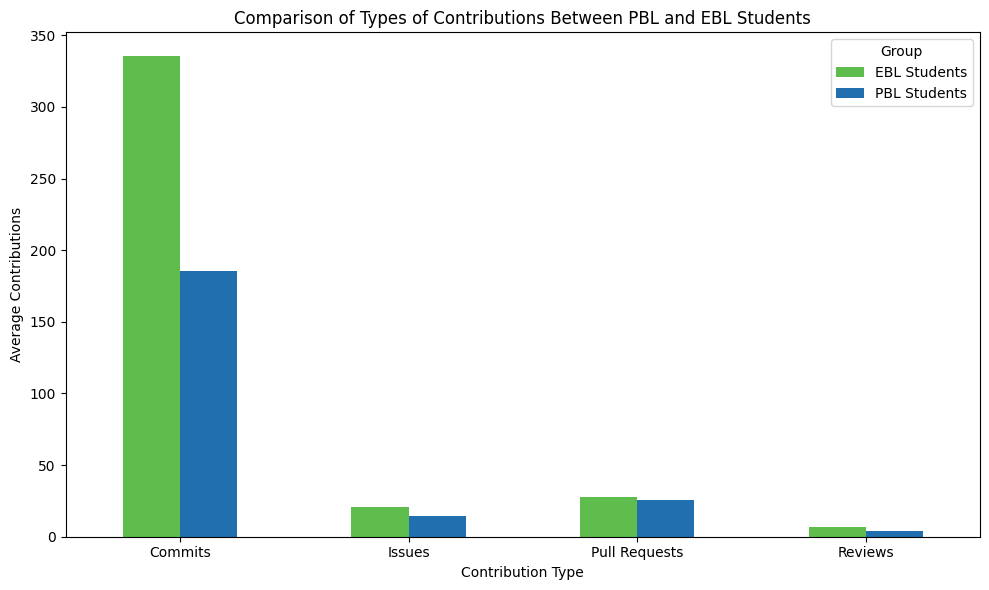

<Figure size 640x480 with 0 Axes>

In [46]:
ebl_contribution_types = {
    'Commits': ebl_extended_stats['Average Commits'],
    'Pull Requests': ebl_extended_stats['Average Pull Requests'],
    'Issues': ebl_extended_stats['Average Issues'],
    'Reviews': ebl_extended_stats['Average Reviews']
}

pbl_contribution_types = {
    'Commits': pbl_extended_stats['Average Commits'],
    'Pull Requests': pbl_extended_stats['Average Pull Requests'],
    'Issues': pbl_extended_stats['Average Issues'],
    'Reviews': pbl_extended_stats['Average Reviews']
}

data = {
    'Contribution Type': ['Commits', 'Pull Requests', 'Issues', 'Reviews']*2,
    'Average Contributions': list(ebl_contribution_types.values()) + list(pbl_contribution_types.values()),
    'Group': ['EBL Students']*4 + ['PBL Students']*4
}

df = pd.DataFrame(data)

pivot_df = df.pivot(index='Contribution Type', columns='Group', values='Average Contributions')

ax = pivot_df.plot(kind='bar', figsize=(10, 6), color=['#5EBD4C', '#226FAF'])

plt.title('Comparison of Types of Contributions Between PBL and EBL Students')
plt.xlabel('Contribution Type')
plt.ylabel('Average Contributions')
plt.xticks(rotation=0)

plt.legend(title='Group')

plt.tight_layout()
plt.show()

plt.savefig('contribution_comparison.png', format='png')


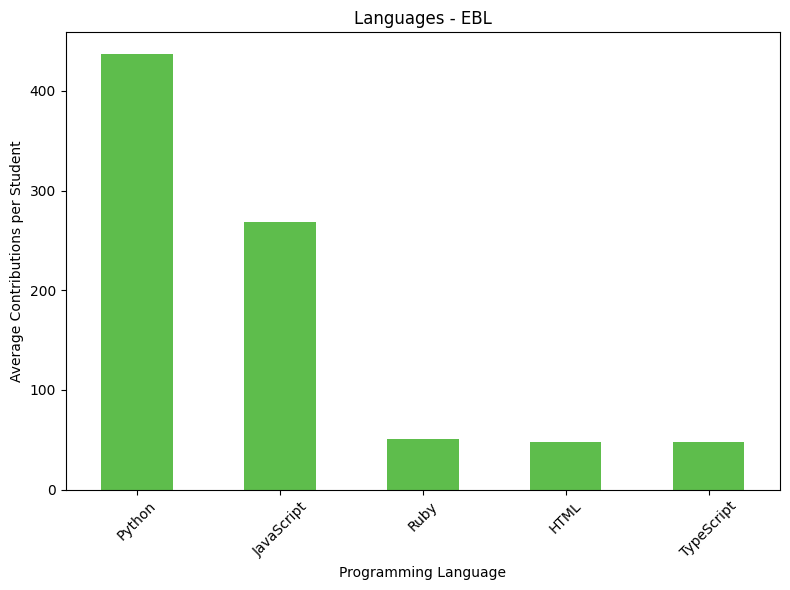

<Figure size 640x480 with 0 Axes>

In [47]:
num_alunos_ebl = ebl_data.shape[0]

language_contributions_ebl = ebl_data.groupby('primary_language')['contributions'].sum() / num_alunos_ebl

top_5_ebl = language_contributions_ebl.nlargest(5)

plt.figure(figsize=(8, 6))
top_5_ebl.plot(kind='bar', color='#5EBD4C')
plt.title('Languages - EBL')
plt.xlabel('Programming Language')
plt.ylabel('Average Contributions per Student')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('languages_comparison_ebl.png', format='png')



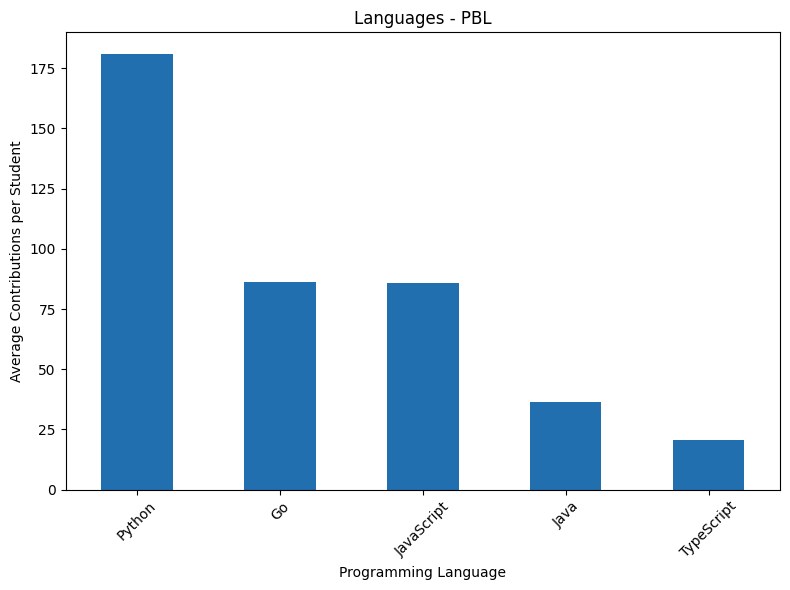

<Figure size 640x480 with 0 Axes>

In [48]:
num_alunos_pbl_mds = pbl_filtered.shape[0]

language_contributions_pbl_mds = pbl_filtered.groupby('primary_language')['contributions'].sum() / num_alunos_pbl_mds

top_5_pbl_mds = language_contributions_pbl_mds.nlargest(5)

plt.figure(figsize=(8, 6))
top_5_pbl_mds.plot(kind='bar', color='#226FAF')
plt.title('Languages - PBL')
plt.xlabel('Programming Language')
plt.ylabel('Average Contributions per Student')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('languages_comparison_pbl.png', format='png')


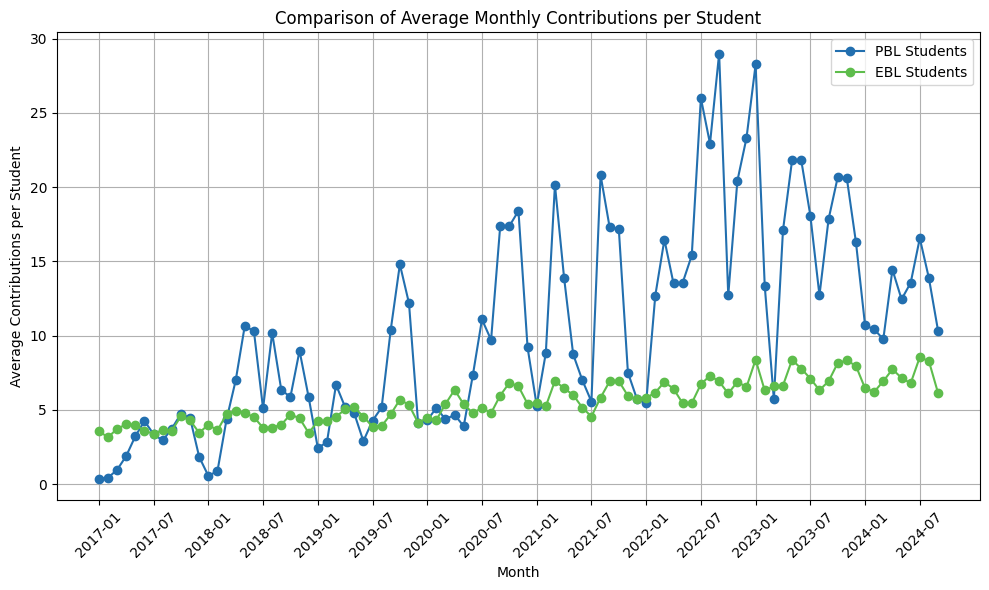

<Figure size 640x480 with 0 Axes>

In [49]:

def safe_convert_to_dict(item):
    if isinstance(item, str):
        return json.loads(item.replace("'", '"'))
    return item

def prepare_monthly_data(df, column, num_students):
    df[column] = df[column].apply(safe_convert_to_dict)
    monthly_data = pd.DataFrame(df[column].tolist())
    monthly_totals = monthly_data.sum().sort_index()
    monthly_average = monthly_totals / num_students 
    return monthly_average

num_alunos_ebl = 45
num_alunos_pbl_mds = 3447

ebl_monthly_avg = prepare_monthly_data(ebl_data, 'monthly_contributions', num_alunos_ebl)
pbl_monthly_avg = prepare_monthly_data(pbl_filtered, 'monthly_contributions', num_alunos_pbl_mds)

plt.figure(figsize=(10, 6))
plt.plot(ebl_monthly_avg.index, ebl_monthly_avg.values, marker='o', linestyle='-', color='#226FAF', label='PBL Students')
plt.plot(pbl_monthly_avg.index, pbl_monthly_avg.values, marker='o', linestyle='-', color='#5EBD4C', label='EBL Students')

plt.title('Comparison of Average Monthly Contributions per Student')
plt.xlabel('Month')
plt.ylabel('Average Contributions per Student')
plt.xticks(ticks=range(0, len(ebl_monthly_avg), 6), labels=ebl_monthly_avg.index[::6], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.savefig('average_monthly_comparison.png', format='png')


## Saving the Plot

Finally, we save the plot as a PNG file for future reference or reporting.